`63070501061 S.RAKNA`

> 30 points, 2 hrs.

# CNN

- Modify the `CNN 10 Classes` program shown in class to make it classify the 7 people’s faces used in the `Eigenfaces` program. 
- Here you should not reduce the number of dimensions, but use the original image before PCA. 
- You can look into this site https://duchesnay.github.io/pystatsml/auto_gallery/ml_lab_face_recognition.html under ***Basic ConvNet*** to help you decide what architecture to choose for your CNN. 
- Report your precision and macro average F-1 score

In [2]:
import tarfile

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [3]:
# Download and prepare the Eigenfaces dataset
tfile = tarfile.open("../eigenfaces/lfw-funneled.tgz", "r:gz")
tfile.extractall(".")

In [4]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [5]:
n_samples, h, w = lfw_people.images.shape  # type: ignore
np.random.seed(42)


In [6]:
n_samples, h, w

(1288, 50, 37)

In [7]:
X = lfw_people.data # type: ignore
n_features = X.shape[1]

In [8]:
y = lfw_people.target # type: ignore
target_names = lfw_people.target_names # type: ignore
n_classes = target_names.shape[0]
print("target y = \n", y)  # target 0-6 for 7 people
print("target names = \n", target_names)


target y = 
 [5 6 3 ... 5 3 5]
target names = 
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [9]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [10]:
# Split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [11]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray) # type: ignore
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

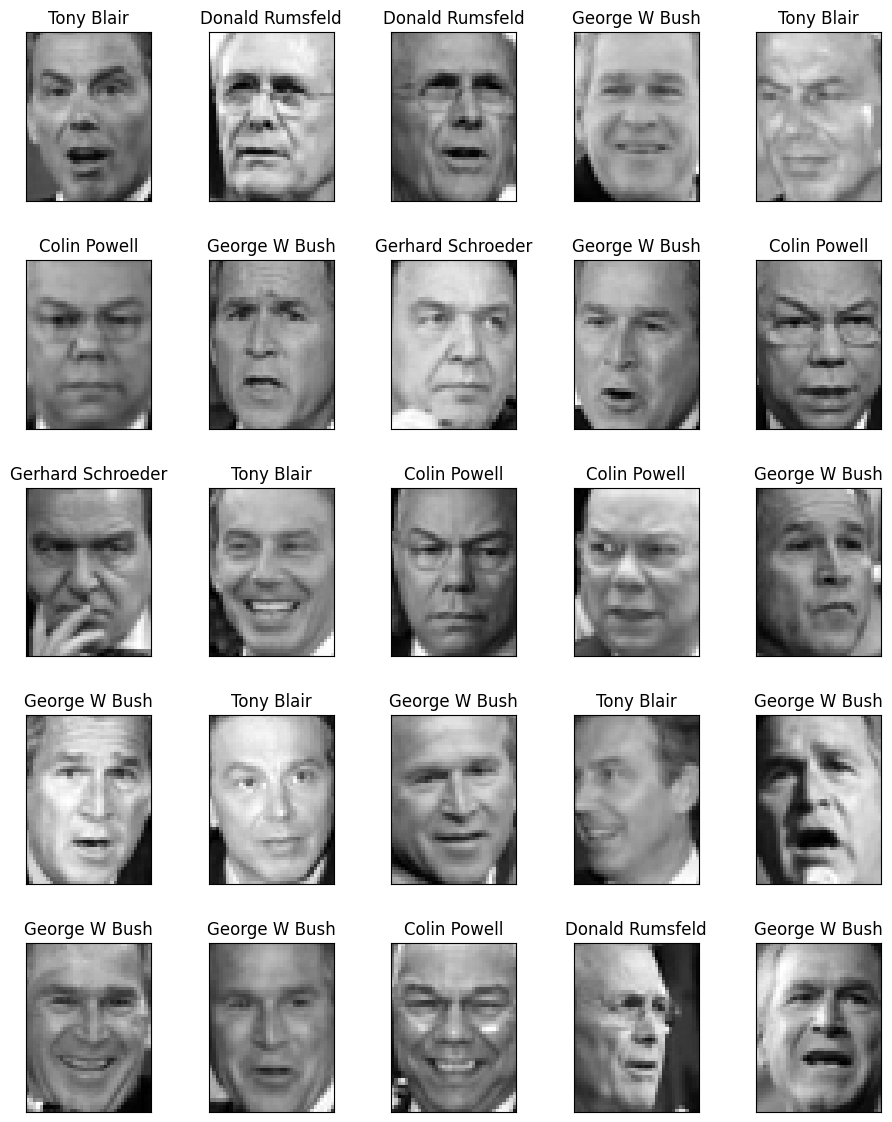

In [12]:
plot_gallery(X_train, target_names[y_train], h, w, 5, 5)

### CNN Section

In [13]:
input_shape = (h, w, 1)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(n_classes, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 35, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 35, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 17, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 17, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 15, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 22, 15, 64)        2

In [14]:
# compile the model
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=["accuracy"]
)

history = model.fit(
    X_train.reshape(-1, h, w, 1),
    tf.keras.utils.to_categorical(y_train),
    epochs=50,
    validation_data=(X_test.reshape(-1, h, w, 1), tf.keras.utils.to_categorical(y_test)),
)


Epoch 1/50
33/33 [==============================] - 2s 38ms/step - loss: 2.1517 - accuracy: 0.3252 - val_loss: 1.8018 - val_accuracy: 0.4612
Epoch 2/50
33/33 [==============================] - 1s 35ms/step - loss: 1.4490 - accuracy: 0.5107 - val_loss: 2.0404 - val_accuracy: 0.4612
Epoch 3/50
33/33 [==============================] - 1s 39ms/step - loss: 1.0132 - accuracy: 0.6398 - val_loss: 2.3033 - val_accuracy: 0.4612
Epoch 4/50
33/33 [==============================] - 1s 30ms/step - loss: 0.7235 - accuracy: 0.7728 - val_loss: 2.1717 - val_accuracy: 0.4612
Epoch 5/50
33/33 [==============================] - 1s 31ms/step - loss: 0.5973 - accuracy: 0.7845 - val_loss: 1.8719 - val_accuracy: 0.5000
Epoch 6/50
33/33 [==============================] - 1s 31ms/step - loss: 0.4980 - accuracy: 0.8350 - val_loss: 1.7660 - val_accuracy: 0.5233
Epoch 7/50
33/33 [==============================] - 1s 29ms/step - loss: 0.3795 - accuracy: 0.8835 - val_loss: 1.6076 - val_accuracy: 0.5078
Epoch 8/50
33

9/9 - 0s - loss: 0.1754 - accuracy: 0.9380 - 116ms/epoch - 13ms/step
test loss =  0.1754254549741745
test accuracy =  0.9379844665527344


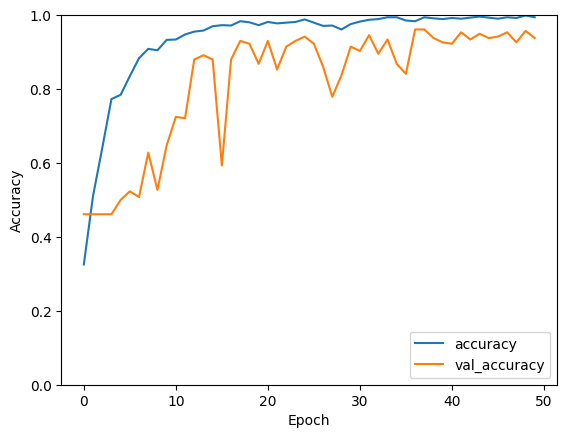

In [15]:
# Evaluate the model and plot training and validation loss and accuracy
test_loss, test_acc = model.evaluate(
    X_test.reshape(-1, h, w, 1),
    tf.keras.utils.to_categorical(y_test),
    verbose=2
)
print("test loss = ", test_loss)
print("test accuracy = ", test_acc)

# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()